In [1]:
import pandas as pd
import numpy as np

In [3]:
# - основы, задачки, терминологии

# - прикладной 
# - бекенд (python bottle, HTML, CSS, JS)
# - ботать

## Кластеризация

Объединяем точки в группы

Гипотеза: близкие объекты имеют схожие свойства 

In [4]:
from sklearn.datasets import make_blobs

In [16]:
# реальном мире (география)
# latitude, longitude
# (ширина, долгота)

coord1 =  (59.9117559403811, 30.32158734862019)
coord2 =  (59.851275280454054, 30.3770223625196)

In [21]:
x, y, z, d = 0.1, 2 ** 0.5, 2.0, 1.0

In [82]:
dataset = make_blobs(n_samples=10000, centers=5, cluster_std=1)

In [83]:
import pandas as pd

In [84]:
df = pd.DataFrame(dataset[0])
df.columns = ['lat', 'lng']

In [85]:
df['race'] = dataset[1]

In [86]:
df

,lat,lng,race
0,-4.902031,0.399320,0
1,-3.356289,-0.075059,0
2,-5.558361,1.136019,2
3,-4.314441,-0.274351,0
4,-2.165866,8.806160,4
...,...,...,...
9995,-2.155591,8.880698,4
9996,9.364788,-0.398404,3
9997,-3.964736,0.442257,1
9998,-2.122693,10.021283,4


In [87]:
## Обычно

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

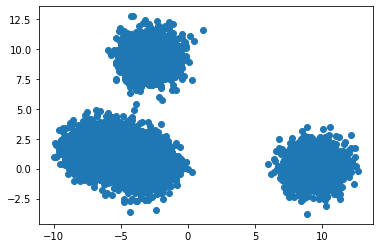

In [89]:
plt.scatter(df['lat'], df['lng'])

<AxesSubplot:xlabel='lat', ylabel='lng'>

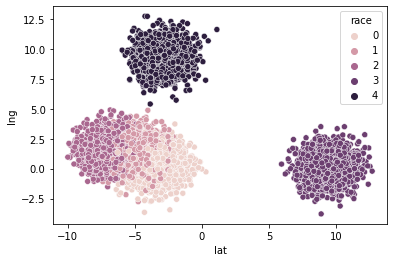

In [97]:
sns.scatterplot(x=df['lat'], y=df['lng'], hue=df['race'])

In [98]:
from sklearn.model_selection import train_test_split

In [170]:
real_columns = ['lat', 'lng']
target = ['race']

X = df[real_columns]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [172]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/Users/michil/.virtualenvs/base/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8783333333333333

In [174]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/var/folders/yb/ysqh2wxs6v1_4q_92fnn6q380000gn/T/ipykernel_19446/1034115400.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


1.0

In [104]:
## Применение кластеризации

In [105]:
from sklearn.cluster import KMeans

In [158]:
knn = KMeans(n_clusters=3)

coords = df[['lat', 'lng']]

knn.fit(coords)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='lat', ylabel='lng'>

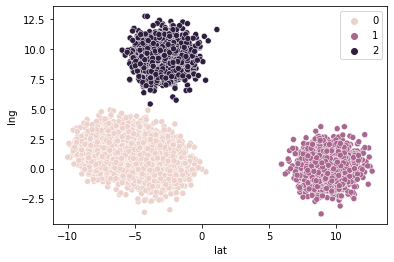

In [159]:
sns.scatterplot(x=df['lat'], y=df['lng'], hue=knn.labels_)

In [160]:
from sklearn.metrics import accuracy_score

In [162]:
df['cluster'] = knn.labels_

In [163]:
df

,lat,lng,race,cluster
0,-4.902031,0.399320,0,0
1,-3.356289,-0.075059,0,0
2,-5.558361,1.136019,2,0
3,-4.314441,-0.274351,0,0
4,-2.165866,8.806160,4,2
...,...,...,...,...
9995,-2.155591,8.880698,4,2
9996,9.364788,-0.398404,3,1
9997,-3.964736,0.442257,1,0
9998,-2.122693,10.021283,4,2


In [175]:
real_columns = ['lat', 'lng']
cat_columns = ['cluster']
target = ['race']

X_real = df[real_columns]
X_cat = df[cat_columns]

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_cat)

X_cat = encoder.transform(X_cat).toarray()


X = np.hstack((X_real, X_cat))
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [167]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/Users/michil/.virtualenvs/base/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michil/.virtualenvs/base/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8712857142857143

In [176]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/var/folders/yb/ysqh2wxs6v1_4q_92fnn6q380000gn/T/ipykernel_19446/1034115400.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


1.0

### Как подбирать n_clusters?

- Метод силуэта (на почитать)
- Метод локтя (рассматриваем)

In [211]:
n_clusters_list = range(1, 15)
inertia_list = []

for n_clusters in n_clusters_list:
    knn = KMeans(n_clusters=n_clusters)
    coords = df[['lat', 'lng']]
    knn.fit(coords)
    
    inertia_list.append(knn.inertia_)

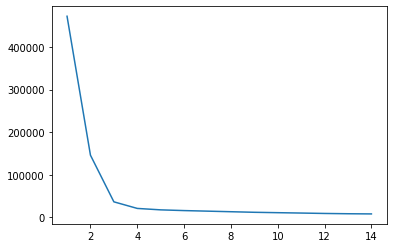

In [212]:
plt.plot(n_clusters_list, inertia_list)

In [214]:
# начиная с 3 "резкость" графика относительно уменьшается
# поэтому 3 кластера - оптимальный вариант

In [215]:
# Главное: отчет!